In [ ]:
!pip install 'tritonclient[all]'

In [1]:
from PIL import Image
import numpy as np
from tritonclient.http import InferInput, InferRequestedOutput, InferenceServerClient
from tritonclient.utils import triton_to_np_dtype

In [2]:
def minmax_scaling(tensor):
    return ((tensor-tensor.min())  /(tensor.max() - tensor.min()))

def postprocessing(tensor):
    if tensor.ndim == 3 :
        tensor = tensor[None, ...]
    assert tensor.ndim == 4
    return [ Image.fromarray((
        minmax_scaling(t)*255).astype(np.uint8).transpose(1,2,0))
     for t in tensor]

In [3]:
client = InferenceServerClient(url="localhost:3691")


In [4]:
batch_input = np.array([["eagle"], ["moon"]]).astype("O")
x = InferInput(name="prompts", shape=(2,1), datatype="BYTES")
x.set_data_from_numpy(batch_input, binary_data=True)
inputs = [x]
outputs = [InferRequestedOutput(name=name,
                                binary_data=True,
                                # If our task isn't classification, set 'class_count' be zero.
                                class_count=0)
            for name in ["output"]]
# Querying the server

results = client.infer(model_name="pipeline",
                        inputs=inputs,
                        outputs=outputs)
output = results.as_numpy("output")

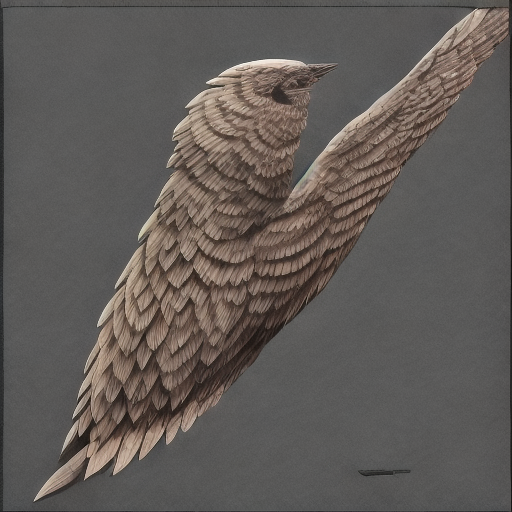

In [7]:
postprocessing(output)[0]

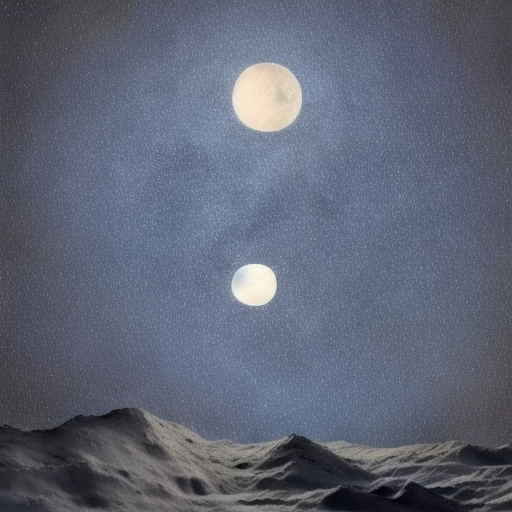

In [8]:
postprocessing(output)[1]

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
pipe = StableDiffusionPipeline.from_pretrained("segmind/tiny-sd").to("cuda", torch.half)

In [11]:
d = pipe.__call__(["eagle", "moon"], num_inference_steps=25)

100%|██████████| 25/25 [00:04<00:00,  5.68it/s]


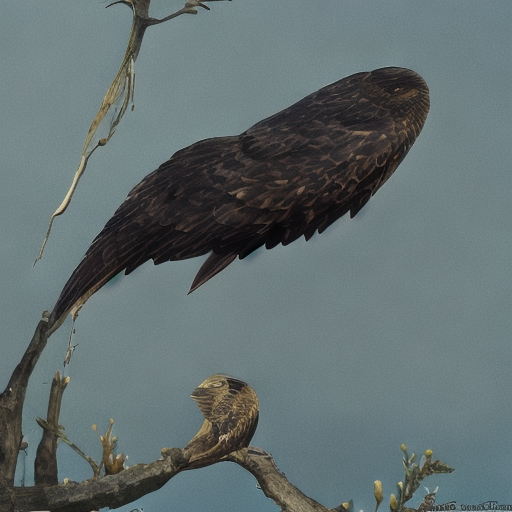

In [12]:
d.images[0]

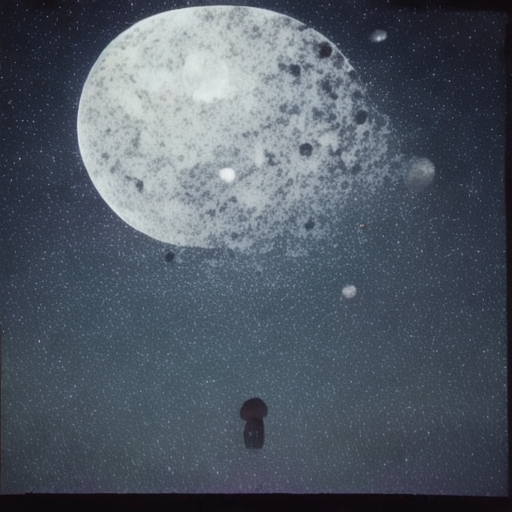

In [13]:
d.images[1]